In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../raw data/DOGE-USD.csv')

In [3]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-01,0.002000,0.002000,0.001999,0.001999,0.001999,2.0
2014-02-02,0.001999,0.001999,0.001999,0.001999,0.001999,2.0
2014-02-03,0.001999,0.001999,0.001820,0.001820,0.001820,20.0
2014-02-04,0.001820,0.001900,0.000982,0.001900,0.001900,3.0
2014-02-05,0.001900,0.001900,0.001240,0.001890,0.001890,5.0


In [6]:
data.index

DatetimeIndex(['2014-02-01', '2014-02-02', '2014-02-03', '2014-02-04',
               '2014-02-05', '2014-02-06', '2014-02-07', '2014-02-08',
               '2014-02-09', '2014-02-10',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=1886, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = data['High']

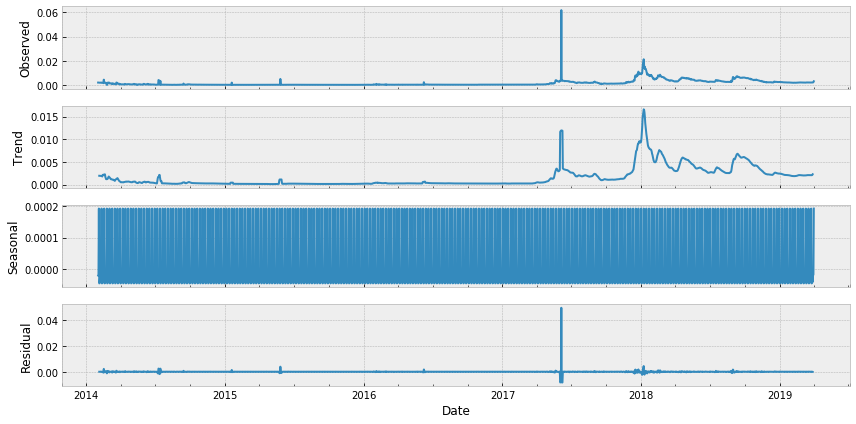

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2016':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

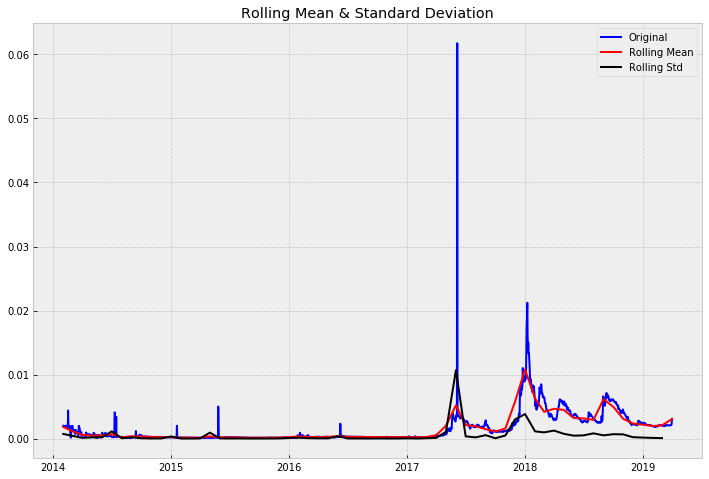

Results of Dickey-Fuller Test:
Test Statistic                   -3.325883
p-value                           0.013760
#Lags Used                       12.000000
Number of Observations Used    1873.000000
Critical Value (1%)              -3.433846
Critical Value (5%)              -2.863084
Critical Value (10%)             -2.567592
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=986.3631975404599  p-value=1.6536192568177997e-216
Largest Lag Included:1 Test Statistic=1940.1734901765824  p-value=0.0
Largest Lag Included:2 Test Statistic=2868.6130445542567  p-value=0.0
Largest Lag Included:3 Test Statistic=3777.8845653348817  p-value=0.0
Largest Lag Included:4 Test Statistic=4660.574932182358  p-value=0.0


In [12]:
test_stationarity(y)

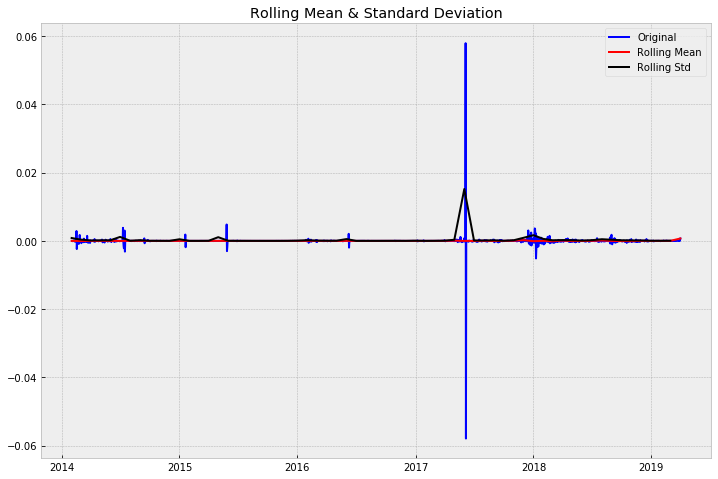

Results of Dickey-Fuller Test:
Test Statistic                -1.820662e+01
p-value                        2.398451e-30
#Lags Used                     1.100000e+01
Number of Observations Used    1.873000e+03
Critical Value (1%)           -3.433846e+00
Critical Value (5%)           -2.863084e+00
Critical Value (10%)          -2.567592e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=431.3843263358006  p-value=8.120647324785917e-96
Largest Lag Included:1 Test Statistic=431.4222297255829  p-value=2.0789934922682158e-94
Largest Lag Included:2 Test Statistic=431.4531680860234  p-value=3.4005170133197304e-93
Largest Lag Included:3 Test Statistic=431.5062847179706  p-value=4.320820477811451e-92
Largest Lag Included:4 Test Statistic=431.53524832300957  p-value=4.717048489799623e-91


In [13]:
test_stationarity(y.diff(1).dropna())

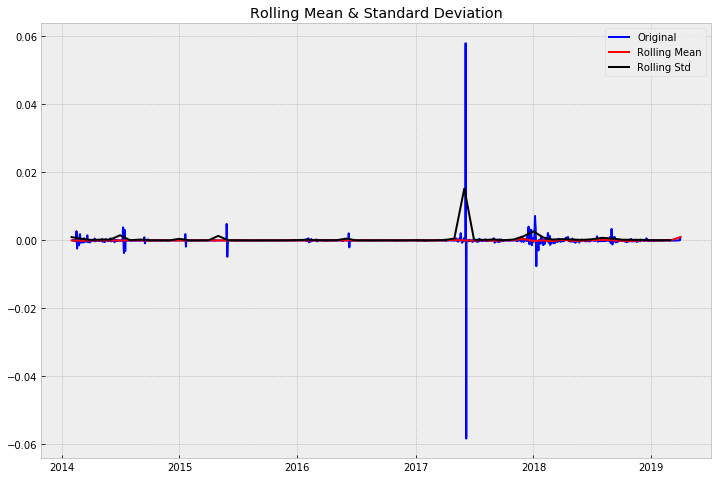

Results of Dickey-Fuller Test:
Test Statistic                -9.443395e+00
p-value                        4.827023e-16
#Lags Used                     2.500000e+01
Number of Observations Used    1.858000e+03
Critical Value (1%)           -3.433874e+00
Critical Value (5%)           -2.863097e+00
Critical Value (10%)          -2.567599e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=2.6902467829283094  p-value=0.10096417588154644
Largest Lag Included:1 Test Statistic=420.40855753877617  p-value=5.122024576883863e-92
Largest Lag Included:2 Test Statistic=420.5002092240984  p-value=8.024021104493097e-91
Largest Lag Included:3 Test Statistic=420.512277433458  p-value=1.0273738483992715e-89
Largest Lag Included:4 Test Statistic=420.54263654808824  p-value=1.1065091958435453e-88


In [14]:
test_stationarity(y.diff(2).dropna())

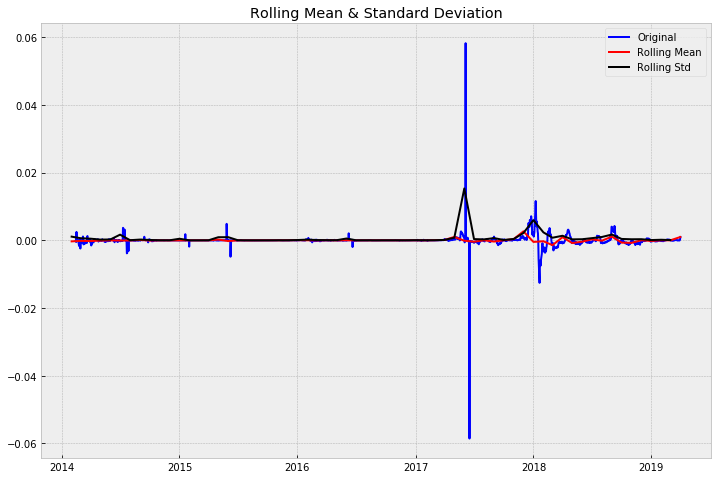

Results of Dickey-Fuller Test:
Test Statistic                -9.570098e+00
p-value                        2.300562e-16
#Lags Used                     2.500000e+01
Number of Observations Used    1.848000e+03
Critical Value (1%)           -3.433894e+00
Critical Value (5%)           -2.863105e+00
Critical Value (10%)          -2.567603e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=103.68871330385865  p-value=2.3673602336300257e-24
Largest Lag Included:1 Test Statistic=181.46145534249314  p-value=3.945895988420778e-40
Largest Lag Included:2 Test Statistic=242.19598228954445  p-value=3.1887199767644096e-52
Largest Lag Included:3 Test Statistic=292.92032824117416  p-value=3.646142321951975e-62
Largest Lag Included:4 Test Statistic=330.39263556666367  p-value=2.90705023612724e-69


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

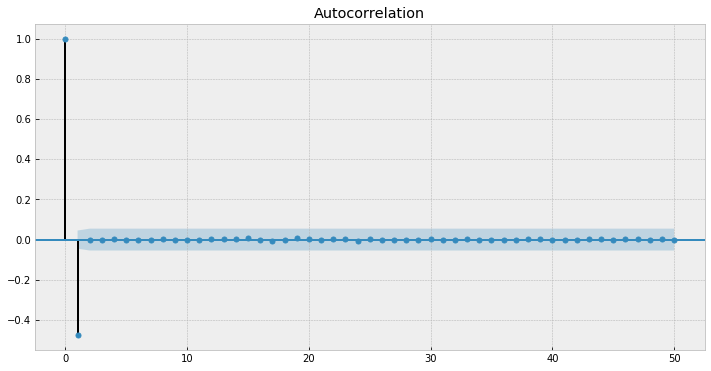

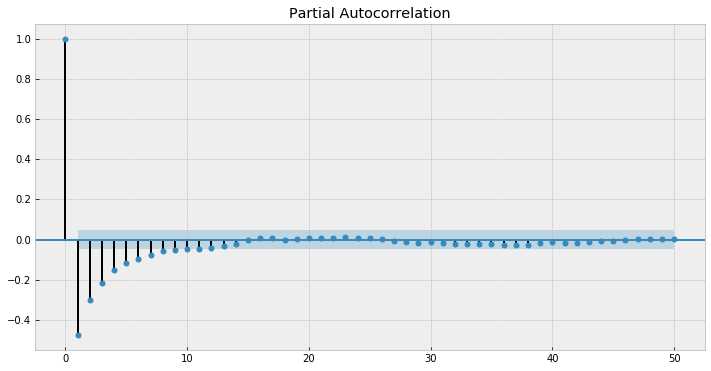

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6876      0.002   -320.034      0.000      -0.692      -0.683
sigma2      2.364e-06   3.27e-09    721.766      0.000    2.36e-06    2.37e-06
-19046.487108671423


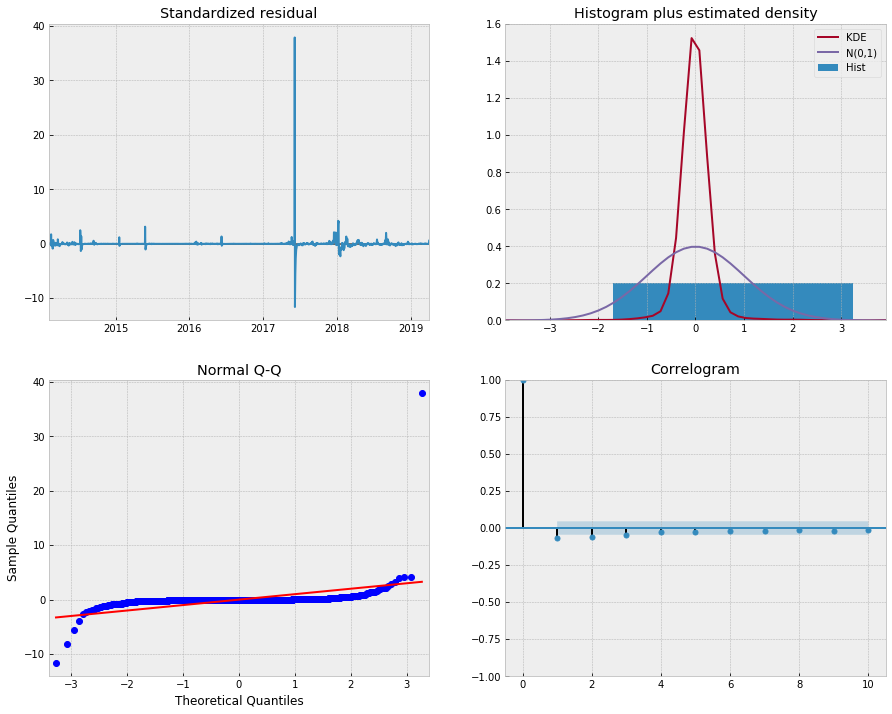

In [17]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

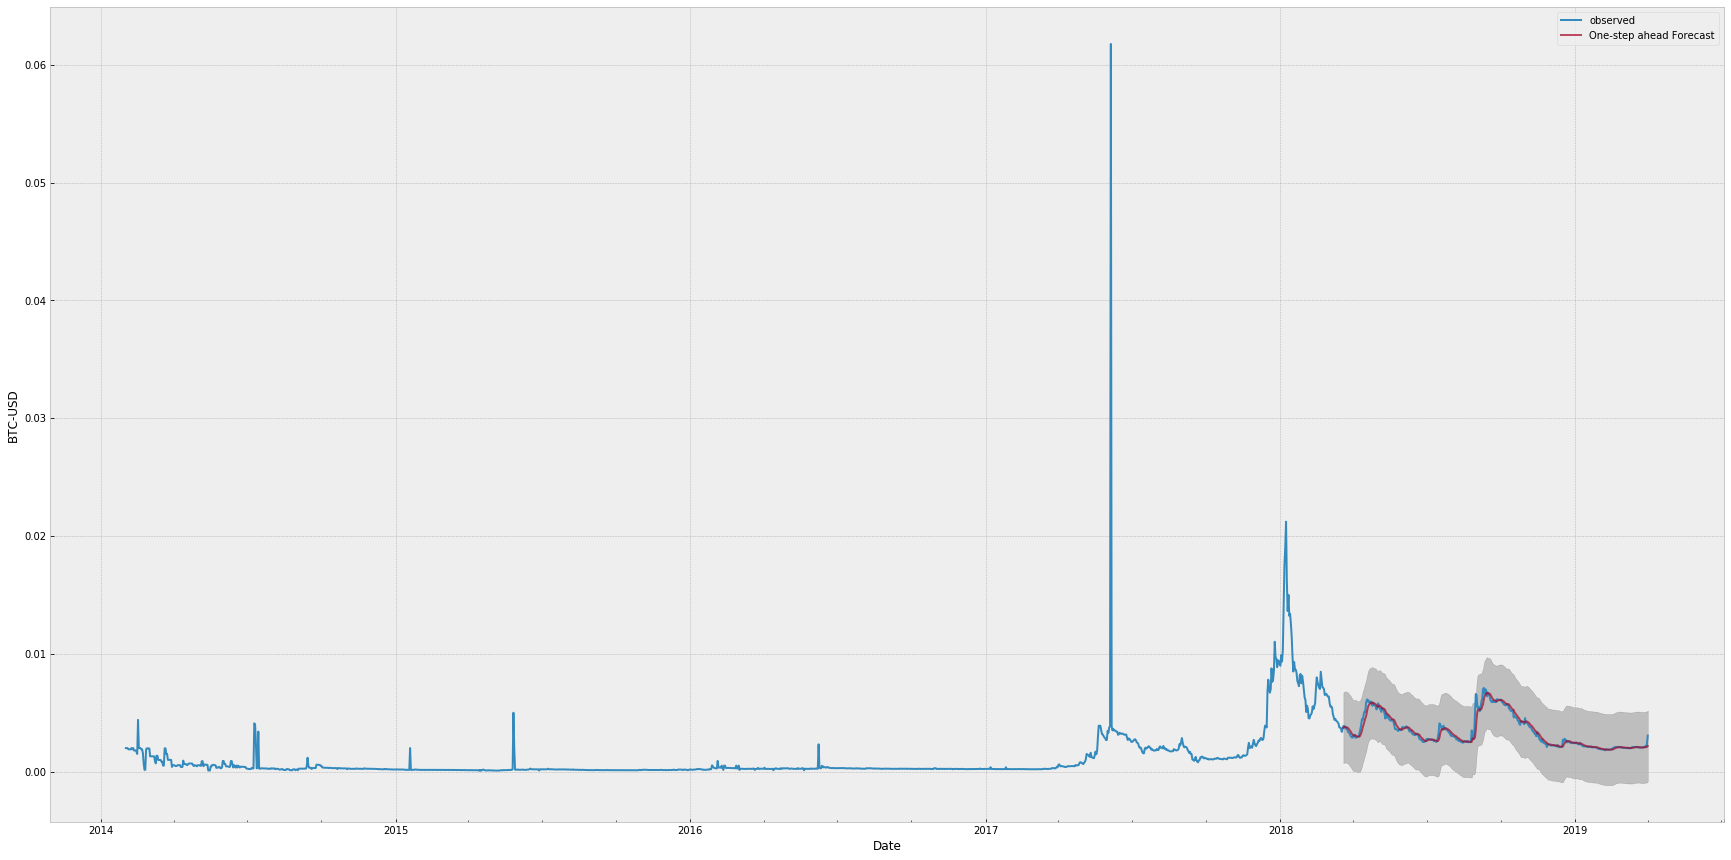

In [18]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0
The R2 of our model is 0.9391


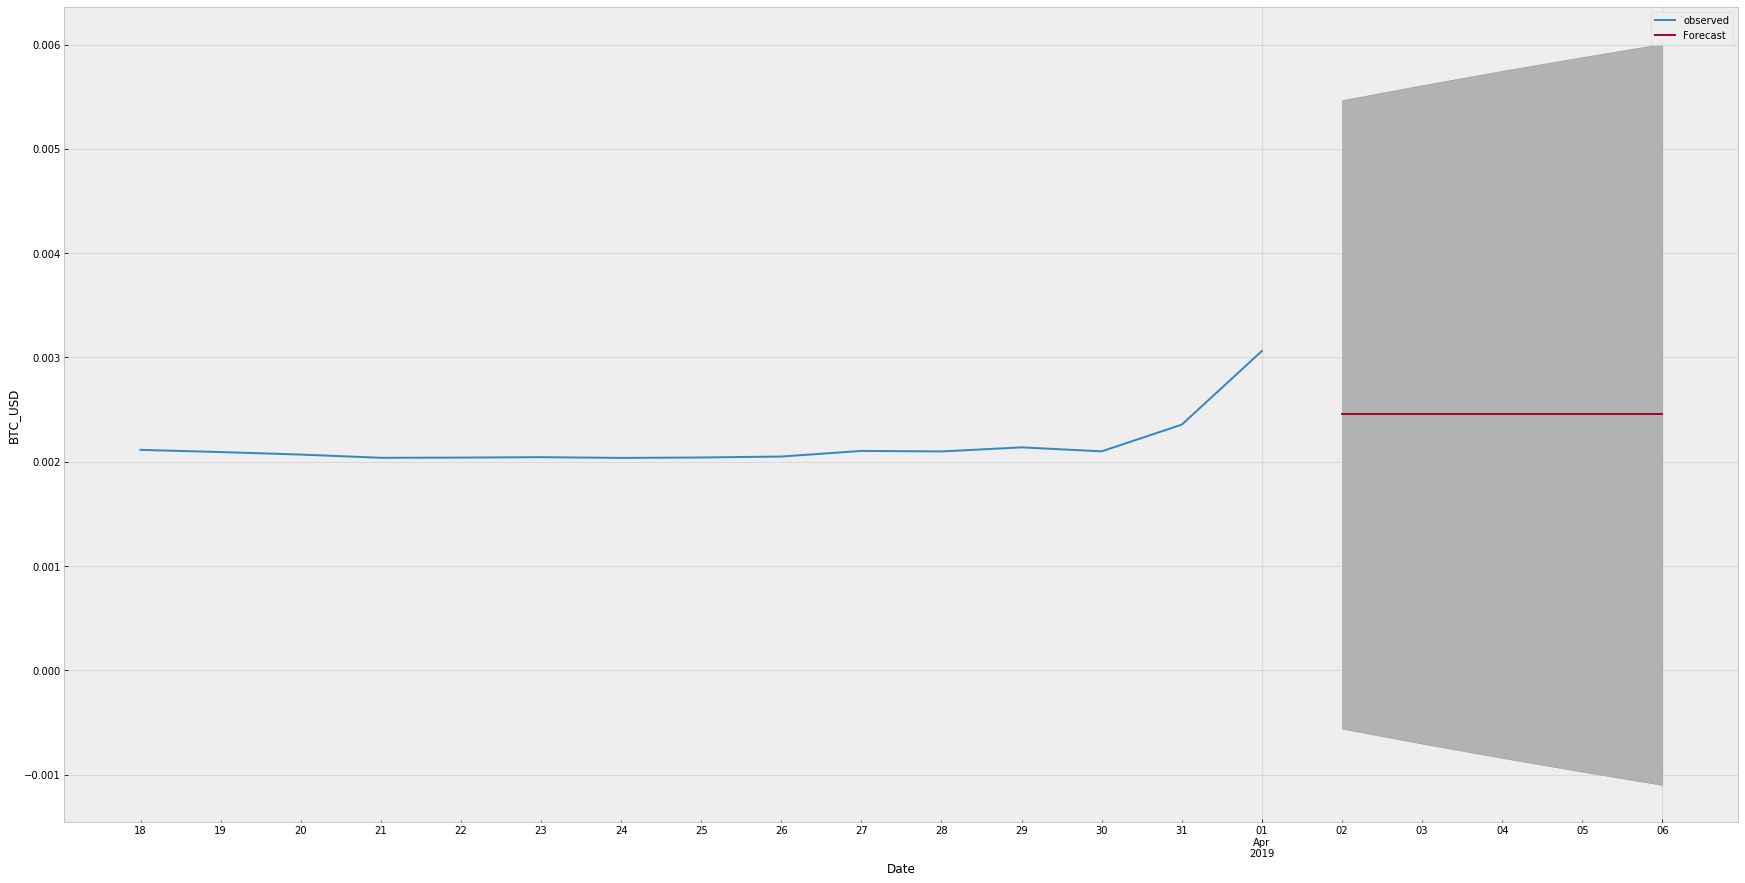

In [20]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [21]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [22]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-18213.431567423744
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-19046.487108671423
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:-19063.132672744185
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:-19053.792698659374
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:-19041.04173328403
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:-19027.220809602437
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:-19014.82398644968
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:-19002.054986805728
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:-18988.854429796724
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:-18975.510974140583
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:-18962.63225081779
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:-18950.058261104743
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:-18938.287890840722
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:-18925.715575586368
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:-18914.447395242896
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:-18899.95712232293
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:-18889.027998947917
ARIMA(0, 1, 17)x(0, 0, 0, 12

ARIMA(6, 1, 18)x(0, 0, 0, 12)12 - AIC:-18856.48770650882
ARIMA(6, 1, 19)x(0, 0, 0, 12)12 - AIC:-18840.31619737172
ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:-18830.697544722214
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:-18990.22520795401
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:-18914.646060617408
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:-18992.08622656882
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:-18986.34194277228
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:-19001.04000420675
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:-19002.042142328668
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:-18997.38618192678
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:-18985.741160130434
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:-18972.51890604915
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:-18959.719284304017
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:-18947.478713793134
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:-18935.972094565182
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:-18920.15541908522
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:-18910.337969183813
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 -

ARIMA(13, 1, 15)x(0, 0, 0, 12)12 - AIC:-18801.515876342783
ARIMA(13, 1, 16)x(0, 0, 0, 12)12 - AIC:-18312.768477895646
ARIMA(13, 1, 17)x(0, 0, 0, 12)12 - AIC:-18284.29156763645
ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:-18478.383579644273
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:-18750.47056927429
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:-18808.010063098867
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:-18924.981115085924
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:-18767.168664183147
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:-18736.706756477484
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:-18806.88034388646
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:-18862.109639690916
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:-18893.479221829002
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:-18910.22207499657
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:-18909.159509366575
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:-18906.42358052636
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:-18733.92279322113
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:-18898.64833213993
ARIMA(14, 1, 1

ARIMA(20, 1, 10)x(0, 0, 0, 12)12 - AIC:-5527.547166393877
ARIMA(20, 1, 11)x(0, 0, 0, 12)12 - AIC:-9831.083412906124
ARIMA(20, 1, 12)x(0, 0, 0, 12)12 - AIC:-10084.214979702678
ARIMA(20, 1, 13)x(0, 0, 0, 12)12 - AIC:-10168.63359868044
ARIMA(20, 1, 14)x(0, 0, 0, 12)12 - AIC:-18340.13461624956
ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:-15196.864654591243
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:-16745.36961941323
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:-17851.579436359058
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:-18146.078210162108
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:-18521.759453179788
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:-18780.60958147461
Finished...


### Min_AIC_list ### 
param                 (0, 1, 2)
param_seasonal    (0, 0, 0, 12)
AIC                    -19063.1
Name: 2, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7392      0.003   -277.751      0.000      -0.744      -0.734
ma.L2         -0.0230      0.004     -5.914      0.000      -0.031      -0.015
sigma2      2.326e-06   3.17e-09    733.269      0.000    2.32e-06    2.33e-06


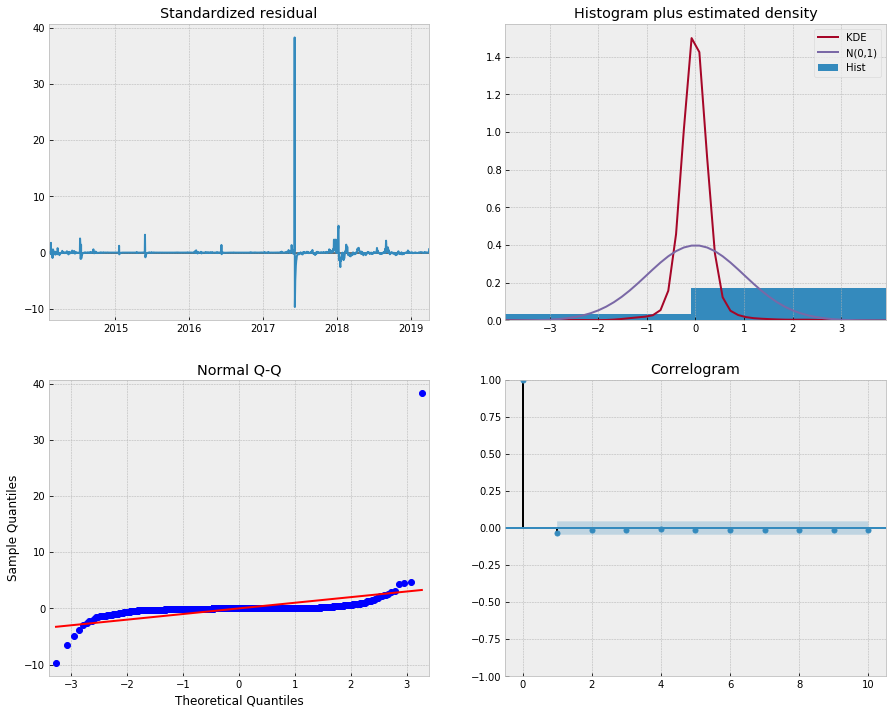

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

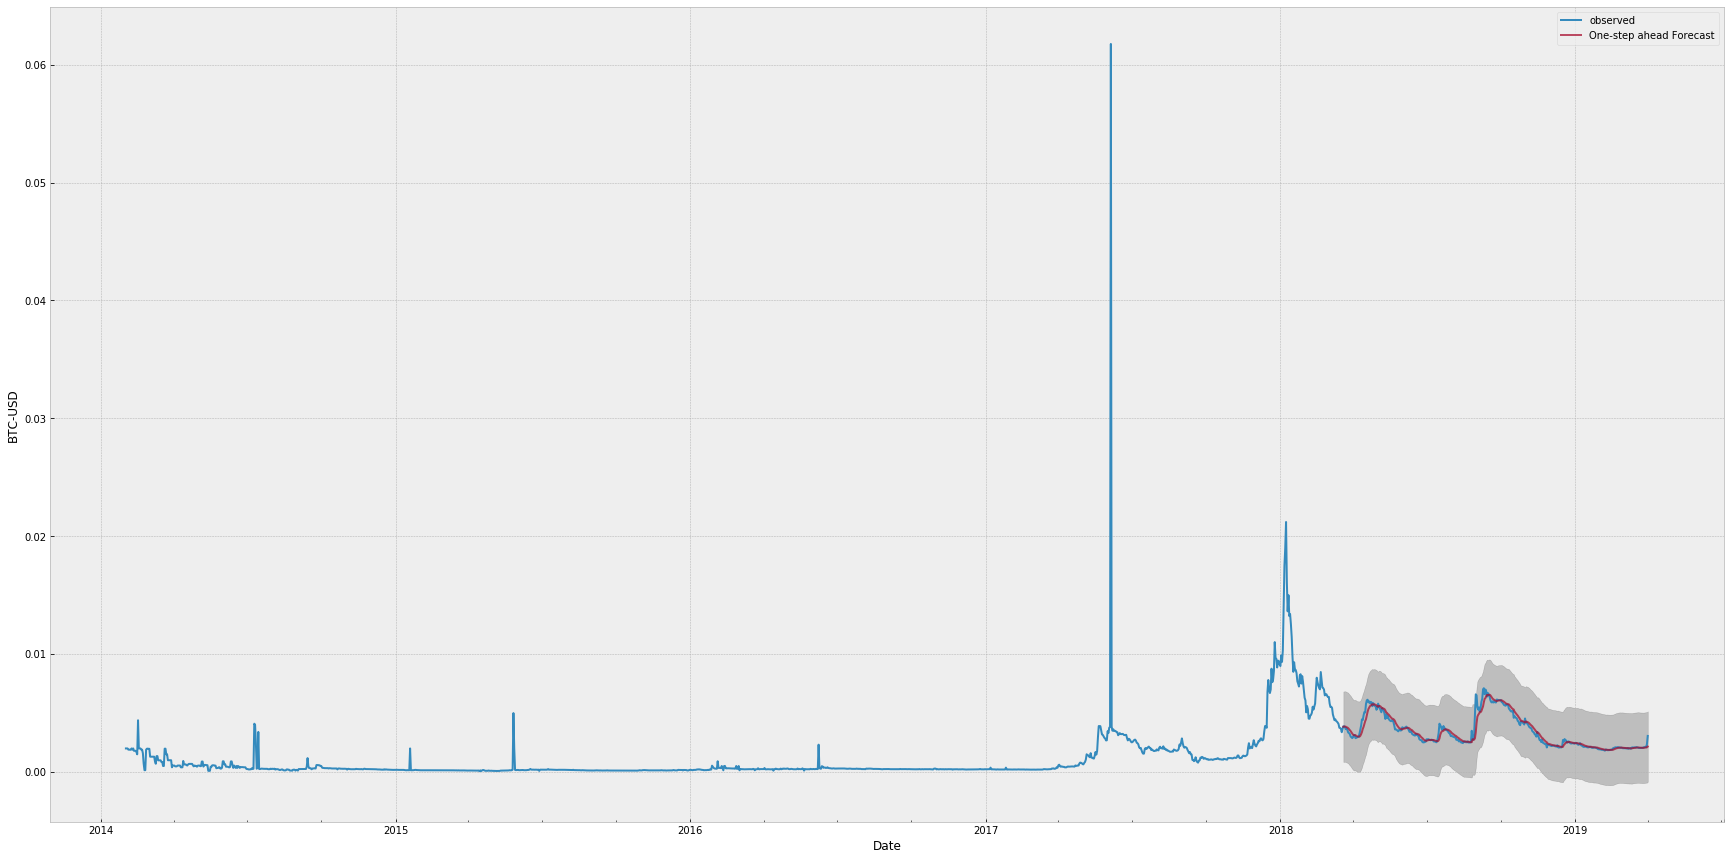

In [24]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0
The R2 of our model is 0.9216


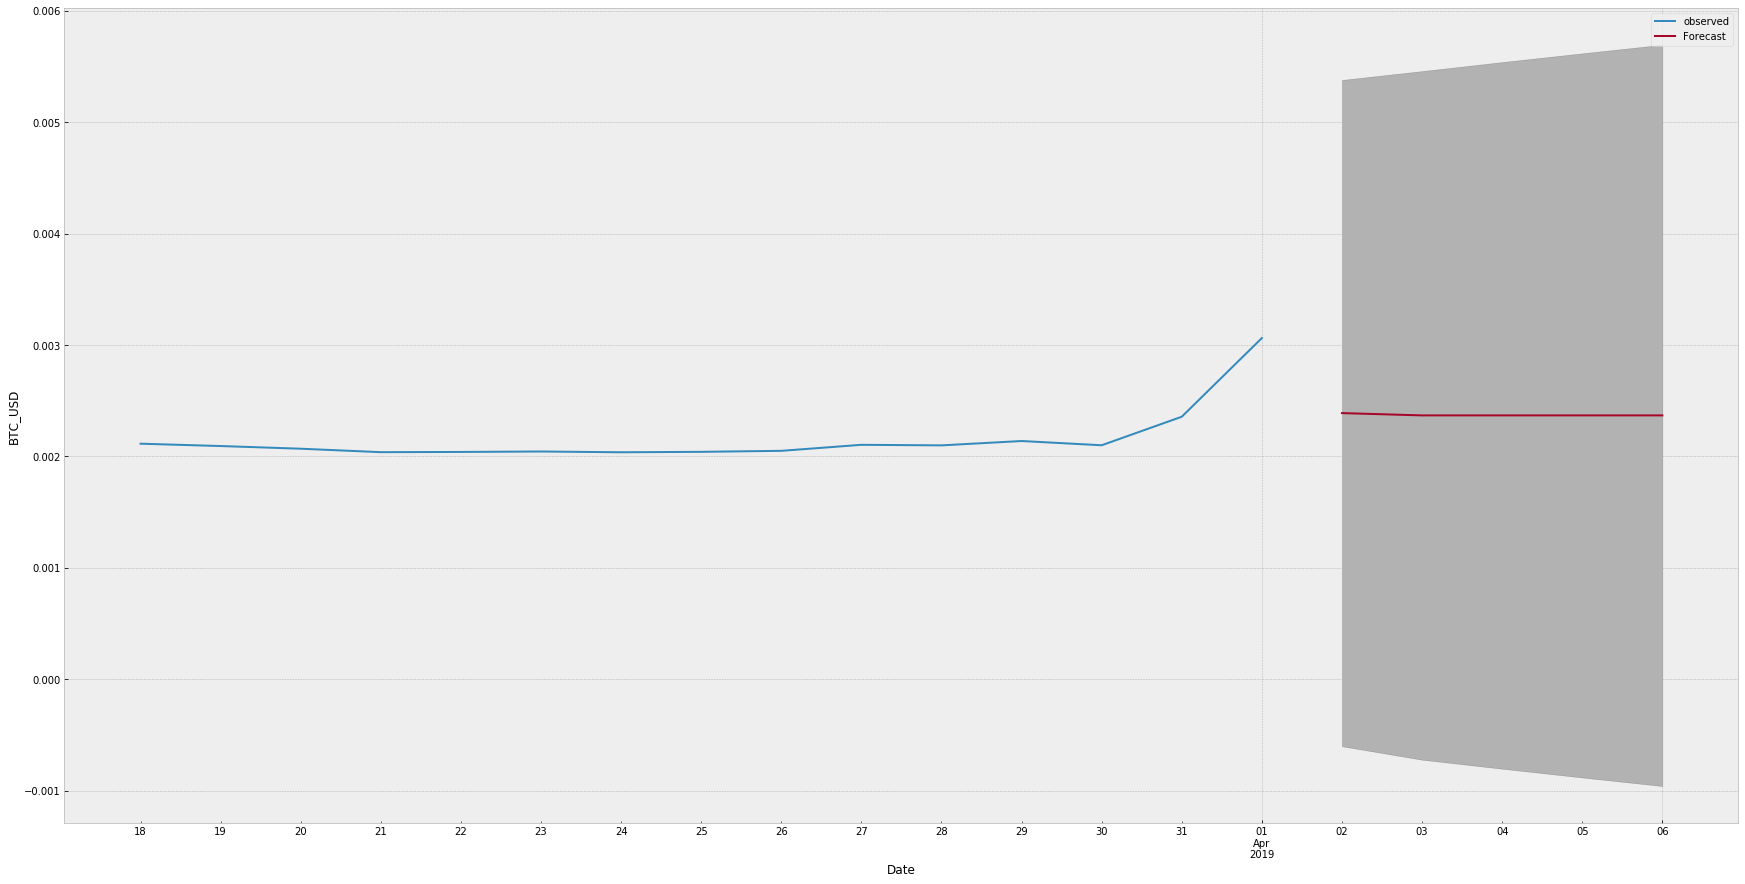

In [26]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.

<table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [27]:
y = data['Low']

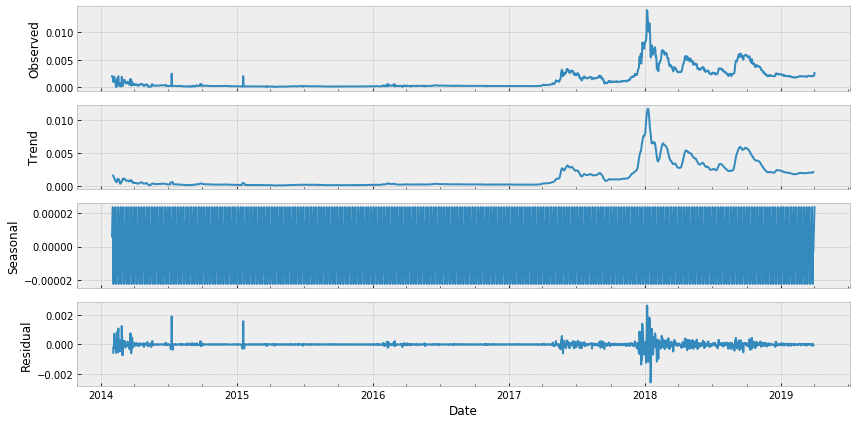

In [28]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [29]:
# y = y['2017':]

In [30]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

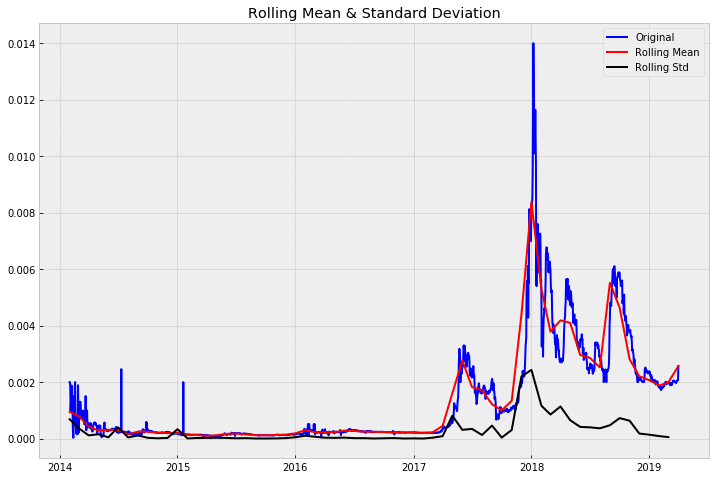

Results of Dickey-Fuller Test:
Test Statistic                   -2.858626
p-value                           0.050375
#Lags Used                       26.000000
Number of Observations Used    1859.000000
Critical Value (1%)              -3.433873
Critical Value (5%)              -2.863096
Critical Value (10%)             -2.567598
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1848.816114076426  p-value=0.0
Largest Lag Included:1 Test Statistic=3662.493979705416  p-value=0.0
Largest Lag Included:2 Test Statistic=5443.609216889237  p-value=0.0
Largest Lag Included:3 Test Statistic=7203.641124416321  p-value=0.0
Largest Lag Included:4 Test Statistic=8941.346776177688  p-value=0.0


In [32]:
test_stationarity(y)

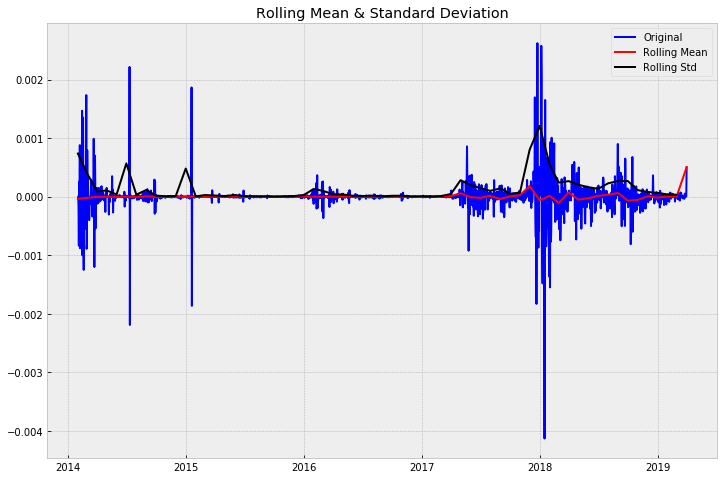

Results of Dickey-Fuller Test:
Test Statistic                -9.378745e+00
p-value                        7.050468e-16
#Lags Used                     2.600000e+01
Number of Observations Used    1.858000e+03
Critical Value (1%)           -3.433874e+00
Critical Value (5%)           -2.863097e+00
Critical Value (10%)          -2.567599e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3.334887693435629  p-value=0.06782503702943454
Largest Lag Included:1 Test Statistic=4.836021263598552  p-value=0.08909869137172341
Largest Lag Included:2 Test Statistic=42.68785783289603  p-value=2.8666842654451846e-09
Largest Lag Included:3 Test Statistic=43.19420345094834  p-value=9.430845632102748e-09
Largest Lag Included:4 Test Statistic=43.21319117798998  p-value=3.345072148996594e-08


In [33]:
test_stationarity(y.diff(1).dropna())

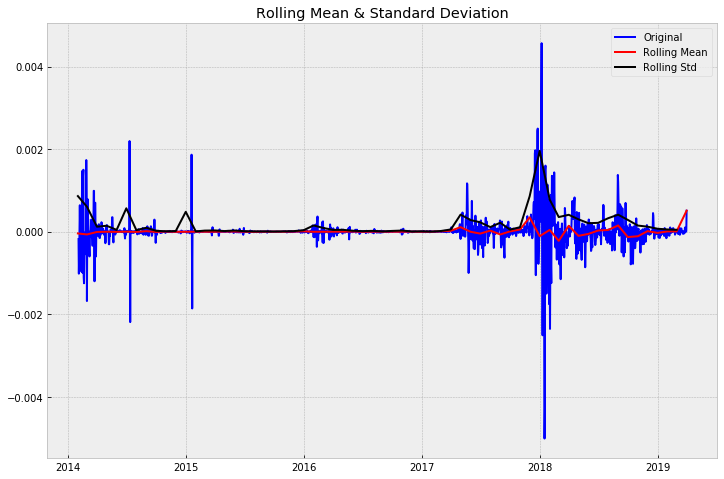

Results of Dickey-Fuller Test:
Test Statistic                -8.616084e+00
p-value                        6.285125e-14
#Lags Used                     2.600000e+01
Number of Observations Used    1.857000e+03
Critical Value (1%)           -3.433876e+00
Critical Value (5%)           -2.863098e+00
Critical Value (10%)          -2.567599e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=404.153377323596  p-value=6.867649736508604e-90
Largest Lag Included:1 Test Statistic=433.8296322751762  p-value=6.238674231119286e-95
Largest Lag Included:2 Test Statistic=478.6606476262627  p-value=2.0091826764502279e-103
Largest Lag Included:3 Test Statistic=485.1239661885415  p-value=1.1047874294673902e-103
Largest Lag Included:4 Test Statistic=497.7908164671859  p-value=2.3938749050553192e-105


In [34]:
test_stationarity(y.diff(2).dropna())

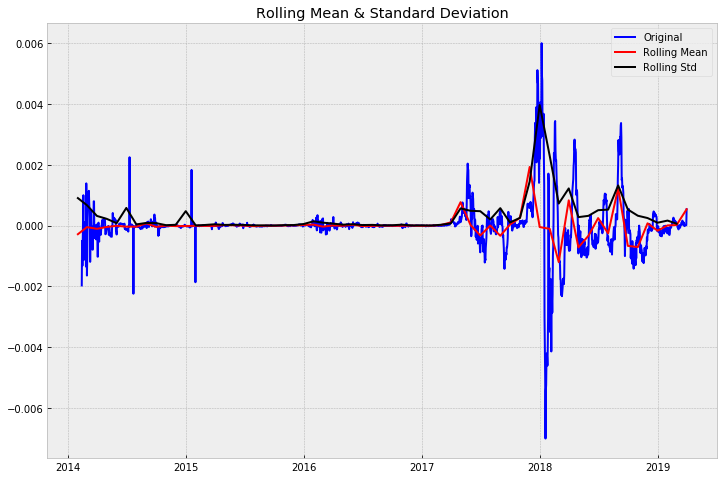

Results of Dickey-Fuller Test:
Test Statistic                -8.089599e+00
p-value                        1.389750e-12
#Lags Used                     2.400000e+01
Number of Observations Used    1.849000e+03
Critical Value (1%)           -3.433892e+00
Critical Value (5%)           -2.863104e+00
Critical Value (10%)          -2.567603e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1520.3545128361554  p-value=0.0
Largest Lag Included:1 Test Statistic=2788.9409678511834  p-value=0.0
Largest Lag Included:2 Test Statistic=3823.271867467748  p-value=0.0
Largest Lag Included:3 Test Statistic=4658.89305772474  p-value=0.0
Largest Lag Included:4 Test Statistic=5308.908956865016  p-value=0.0


In [35]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

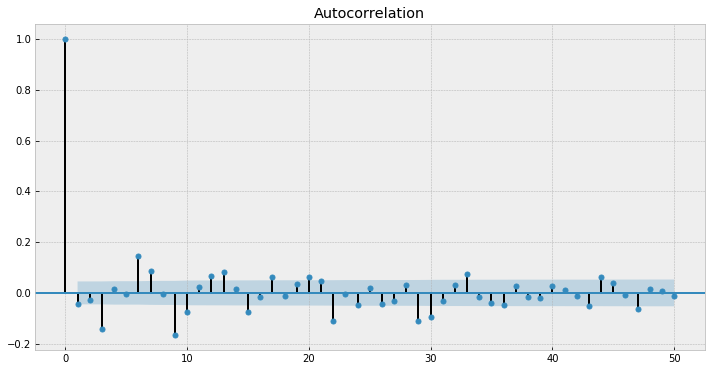

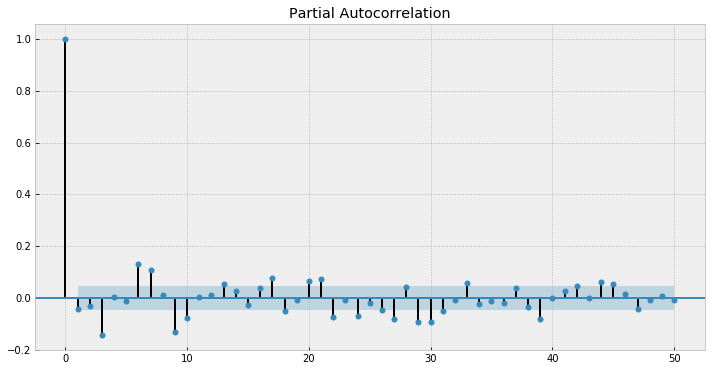

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.889e-08   4.03e-10    170.926      0.000    6.81e-08    6.97e-08
-25717.969549833877


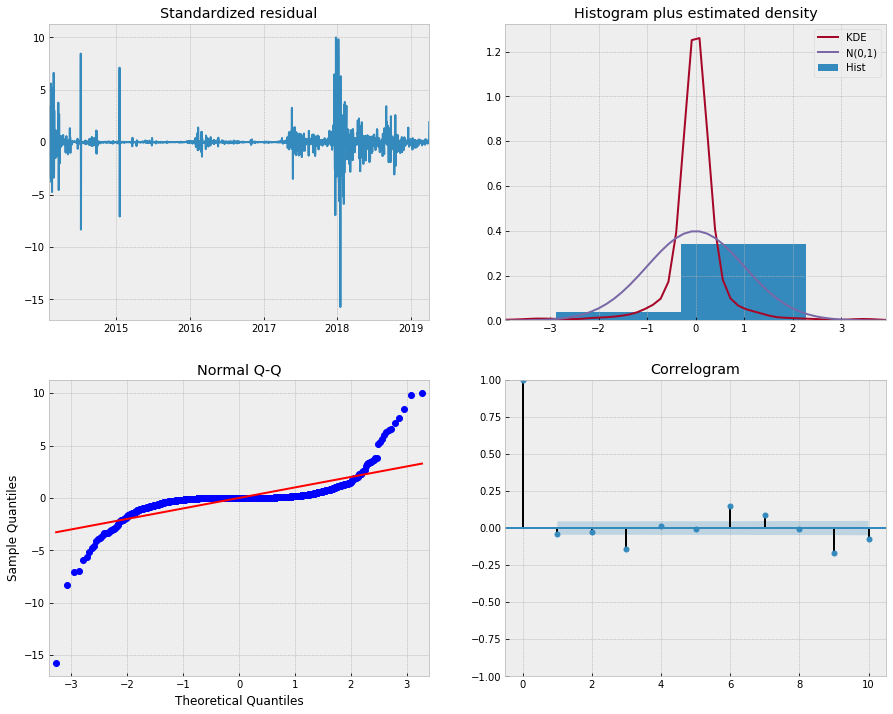

In [37]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

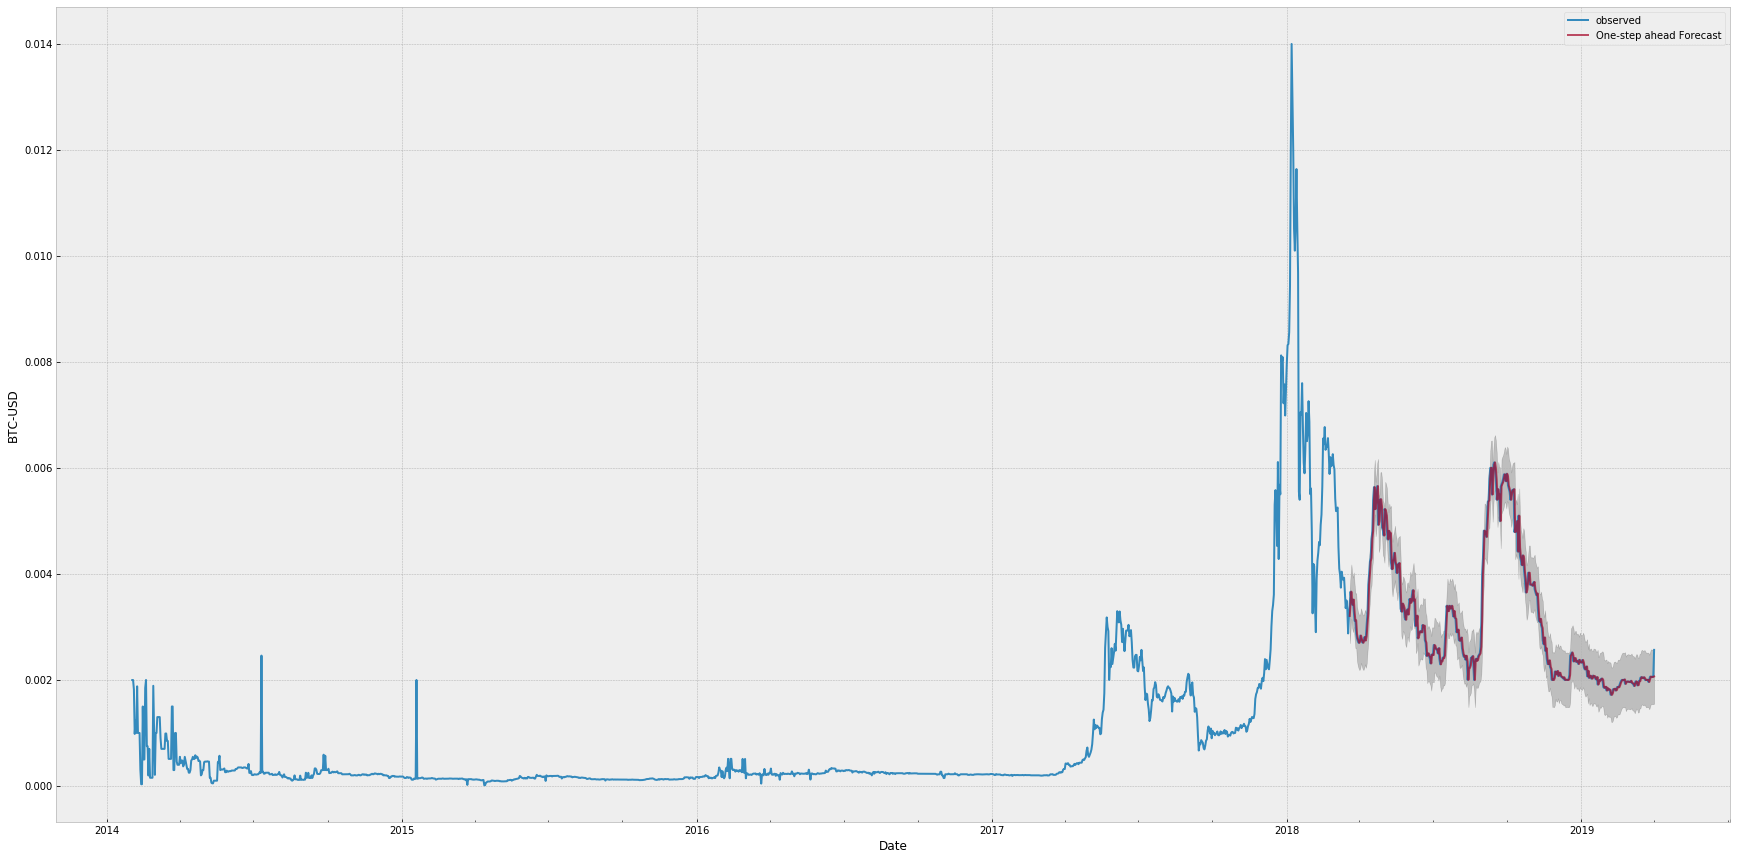

In [38]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0
The R2 of our model is 0.9783


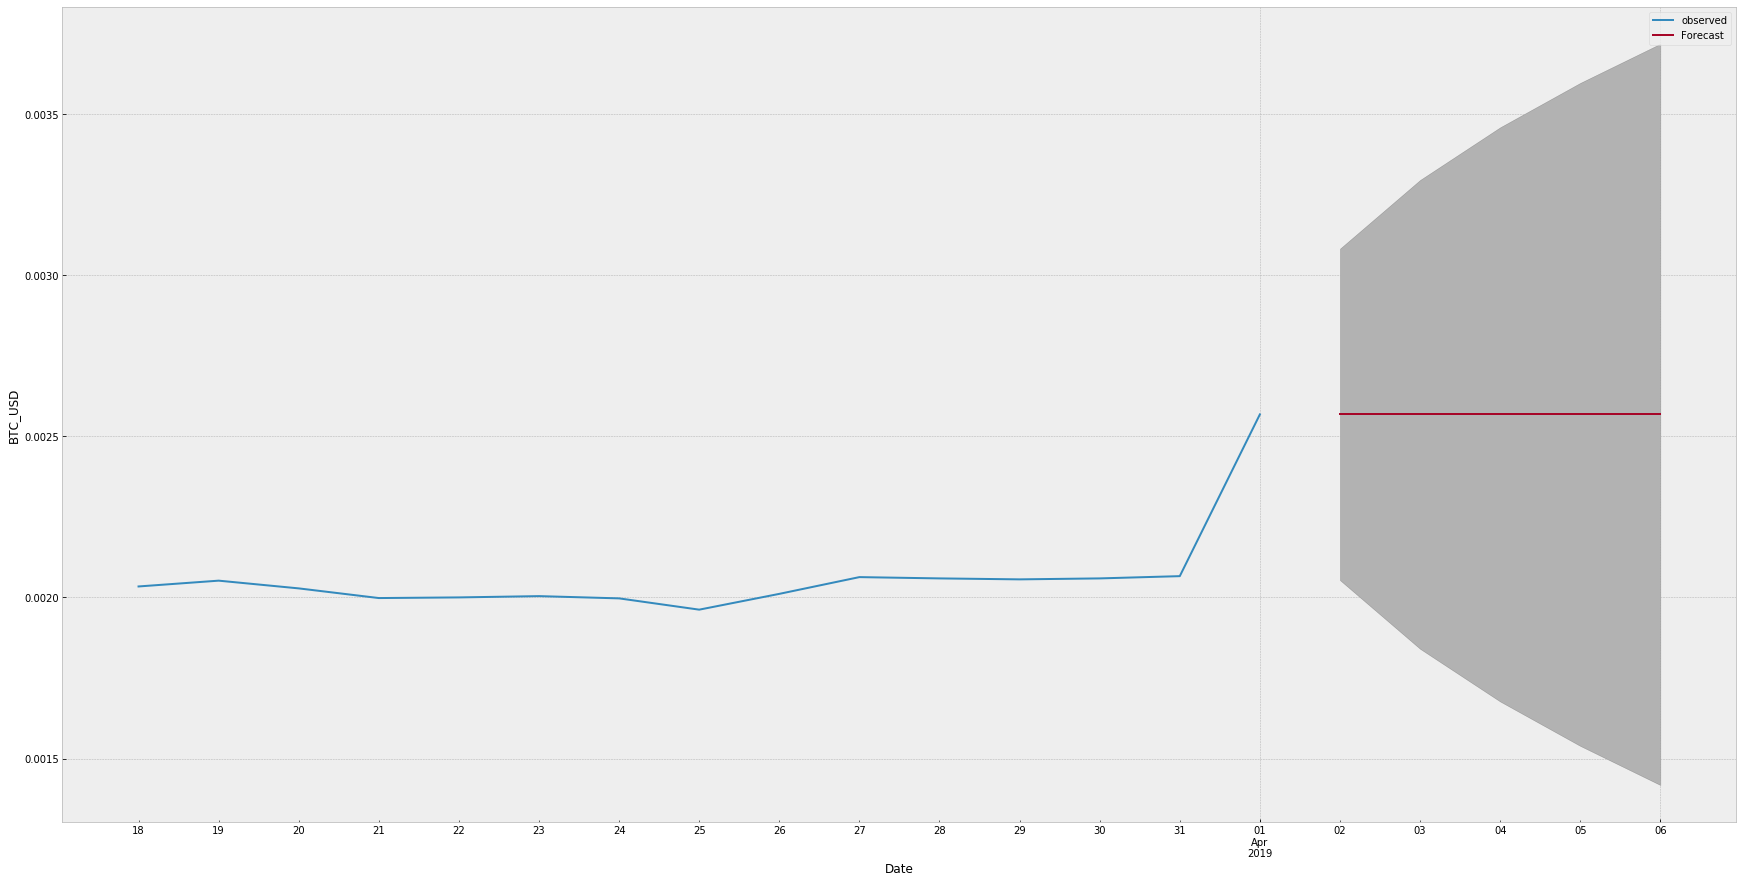

In [40]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [41]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [42]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-25717.969549833877
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-25705.363802998916
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:-25702.02595725497
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:-25713.38594740112
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:-25697.775875746047
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:-25691.435815506004
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:-25710.785145440135
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:-25705.89175212204
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:-25687.636238181985
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:-25717.83790808553
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:-25708.904282042928
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:-25696.97533012457
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:-25714.0100485134
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:-25726.807396276003
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:-25714.983300668962
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:-25728.69400513548
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:-25737.82657915255
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 -

ARIMA(6, 1, 18)x(0, 0, 0, 12)12 - AIC:-25742.483755380992
ARIMA(6, 1, 19)x(0, 0, 0, 12)12 - AIC:-25740.177265360202
ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:-25726.5824914333
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:-25746.715202292617
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:-25744.744322277984
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:-25741.415268201374
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:-24947.010534081266
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:-25300.809491973356
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:-25760.474766074978
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:-25751.830076893842
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:-25749.653738658024
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:-25751.412809521382
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:-25733.908717456776
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:-25711.66266565096
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:-25712.046280498944
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:-25715.801865880167
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:-25679.619720882736
ARIMA(7, 1, 14)x(0, 0, 0, 1

ARIMA(13, 1, 14)x(0, 0, 0, 12)12 - AIC:-25685.21631718697
ARIMA(13, 1, 15)x(0, 0, 0, 12)12 - AIC:-25721.75292996833
ARIMA(13, 1, 16)x(0, 0, 0, 12)12 - AIC:-25707.319779393896
ARIMA(13, 1, 17)x(0, 0, 0, 12)12 - AIC:-25725.92408881856
ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:-25714.05233106217
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:-25713.54786474209
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:-25693.06286735001
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:-25737.99279410307
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:-25735.656977985953
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:-25732.847380409155
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:-25733.100805111655
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:-25729.68709076551
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:-25704.9698730875
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:-11425.625622075499
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:-4069.669933702222
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:-21780.51766824915
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:-24120.889847902734
ARIMA(14, 1, 10)x(0

ARIMA(20, 1, 9)x(0, 0, 0, 12)12 - AIC:-10563.6621589351
ARIMA(20, 1, 10)x(0, 0, 0, 12)12 - AIC:-20959.524556029588
ARIMA(20, 1, 11)x(0, 0, 0, 12)12 - AIC:-23307.211857371247
ARIMA(20, 1, 12)x(0, 0, 0, 12)12 - AIC:-24206.432455787068
ARIMA(20, 1, 13)x(0, 0, 0, 12)12 - AIC:-23253.995104676993
ARIMA(20, 1, 14)x(0, 0, 0, 12)12 - AIC:-24482.627337866015
ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:-25714.958038024757
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:-25689.885267083035
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:-25684.1806621399
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:-25672.838261113026
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:-25620.352652714962
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:-25664.032628629393
Finished...


### Min_AIC_list ### 
param                 (3, 1, 6)
param_seasonal    (0, 0, 0, 12)
AIC                    -25771.4
Name: 69, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3245      0.003    103.699      0.000       0.318       0.331
ar.L2         -0.2111      0.004    -54.647      0.000      -0.219      -0.203
ar.L3         -0.5649      0.004   -135.801      0.000      -0.573      -0.557
ma.L1         -0.3749      0.003   -118.660      0.000      -0.381      -0.369
ma.L2          0.2361      0.004     57.735      0.000       0.228       0.244
ma.L3          0.4559      0.003    142.497      0.000       0.450       0.462
ma.L4          0.0269      0.007      3.647      0.000       0.012       0.041
ma.L5         -0.0274      0.005     -5.723      0.000      -0.037      -0.018
ma.L6          0.0959      0.006     17.212      0.000       0.085  

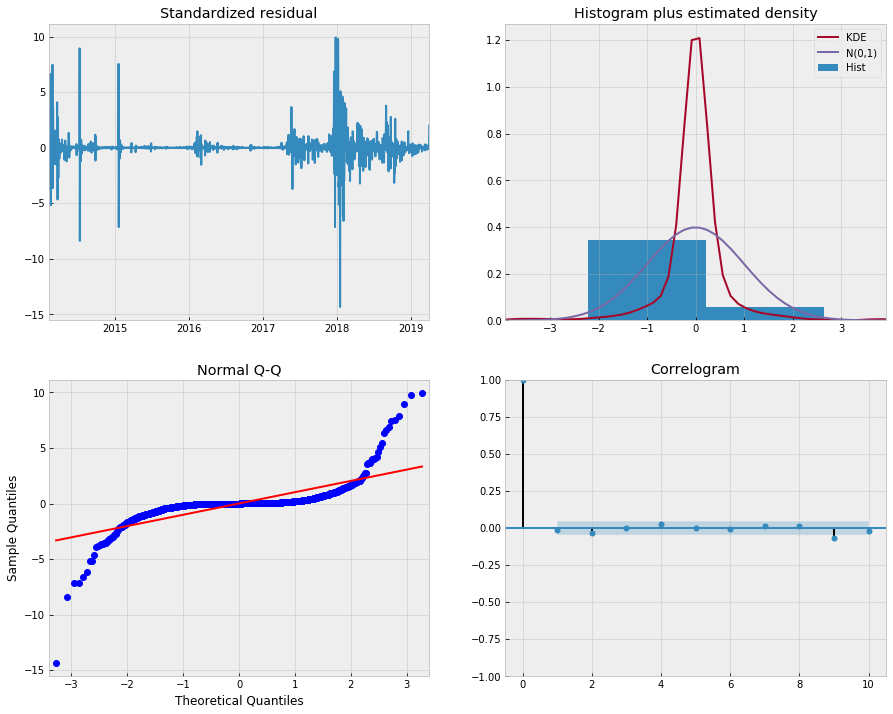

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

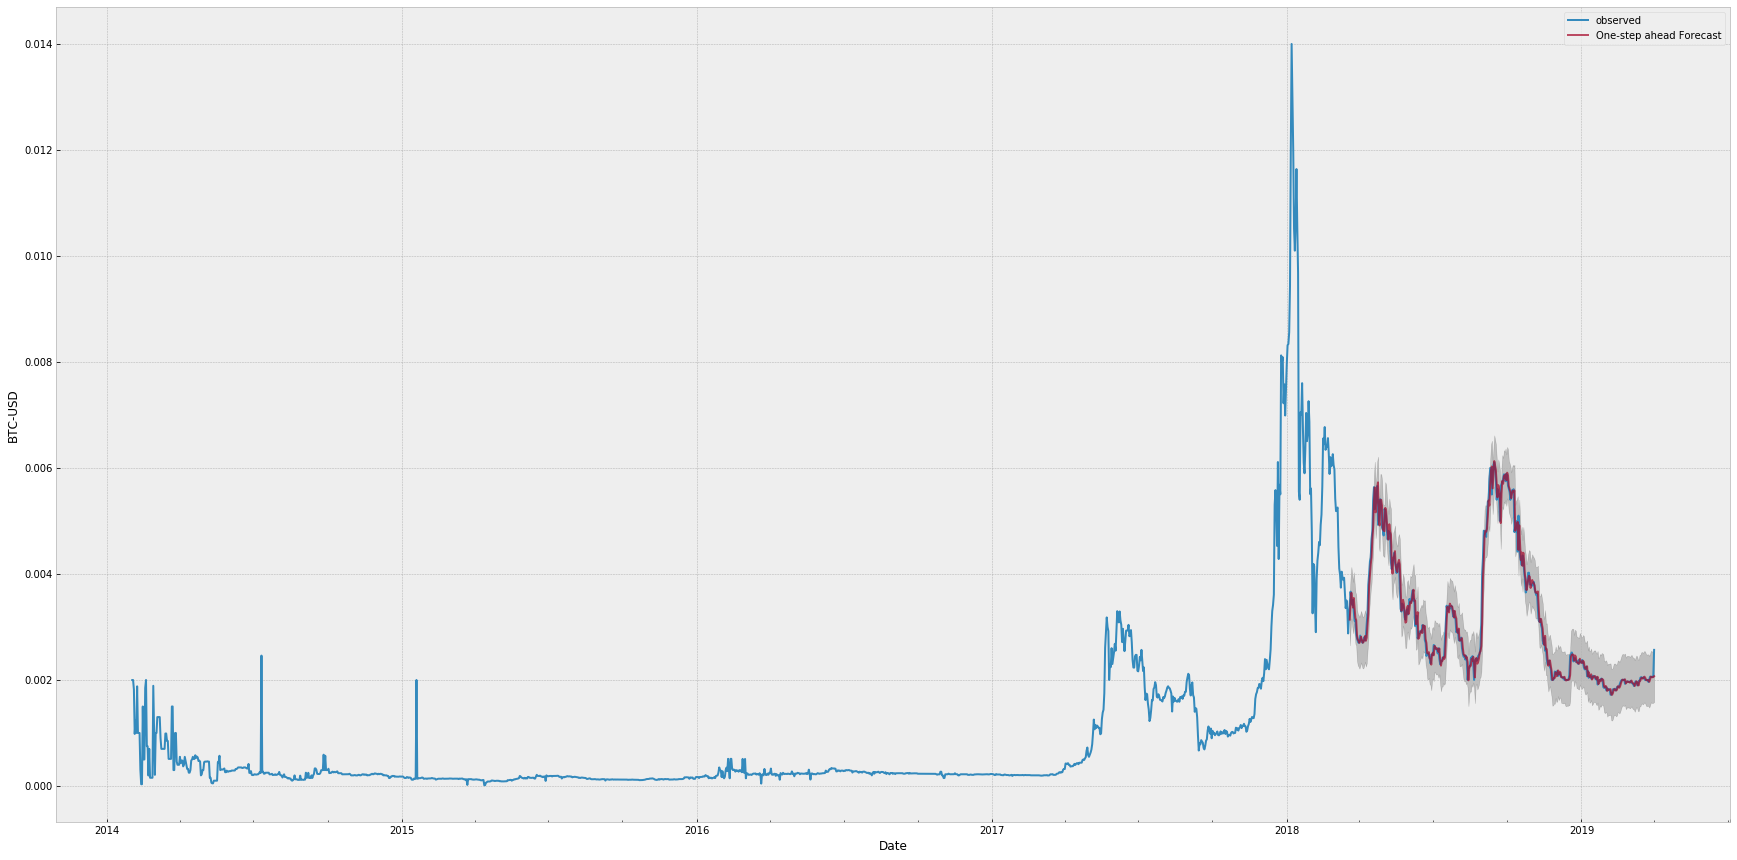

In [44]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0
The R2 of our model is 0.9781


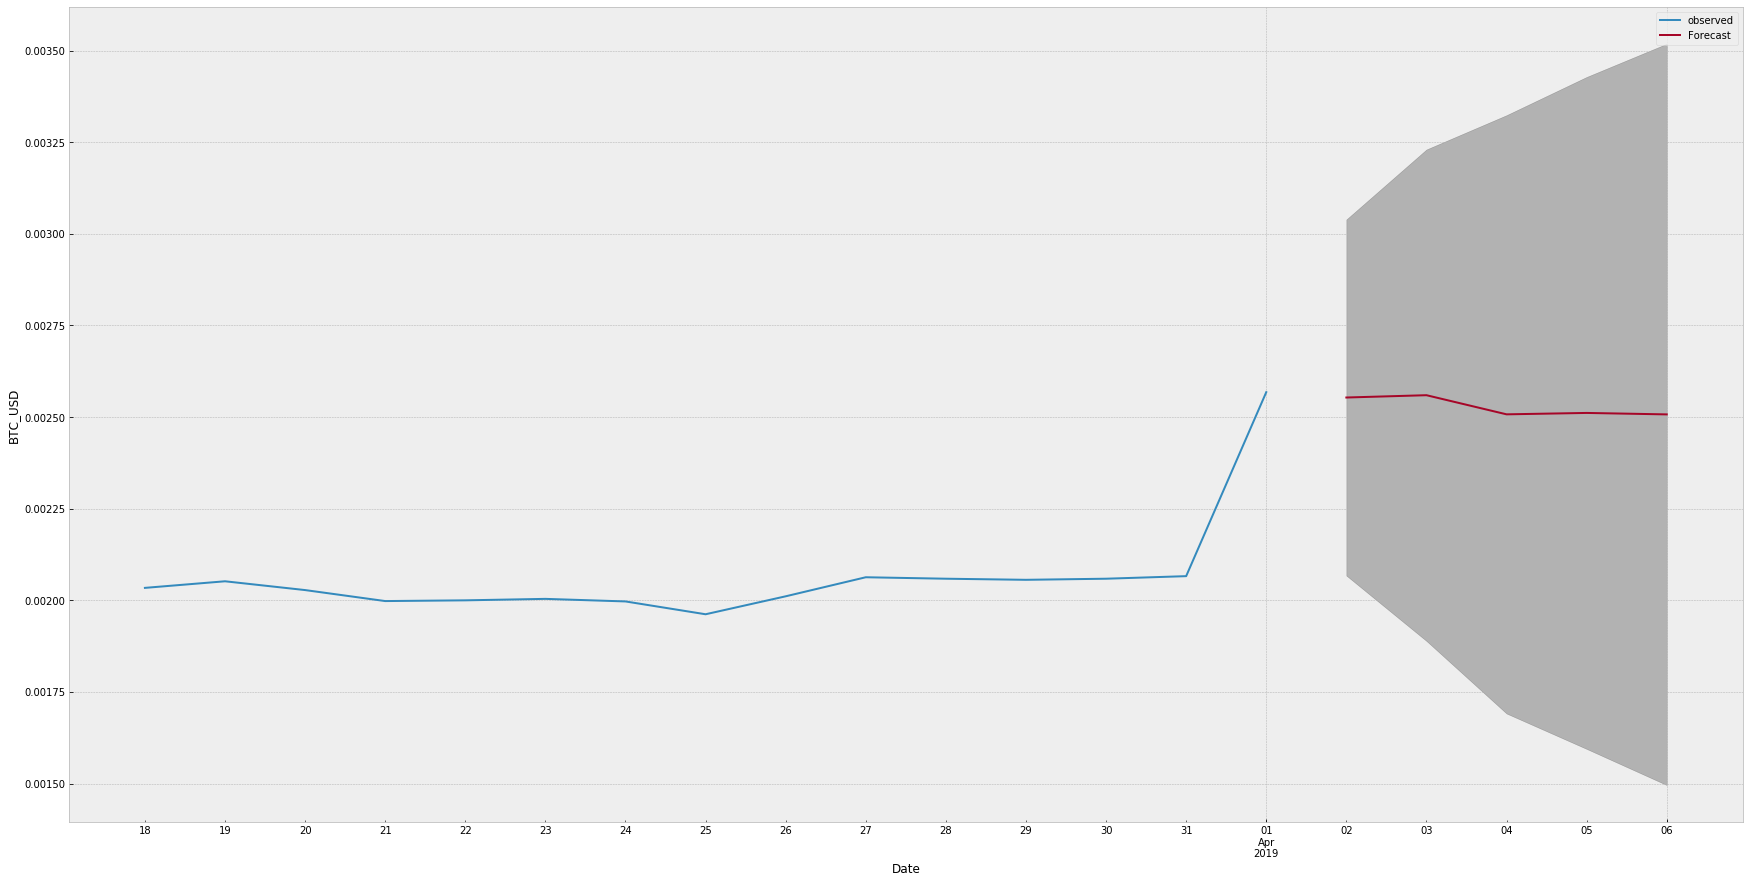

In [46]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.